
load the data

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

In [2]:
economic_data = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week10\Change_point_analysis-\data\WORLD DATA.csv')
oil_data = pd.read_csv(r'C:\Users\befekadum\Documents\10x acadamy\week10\Change_point_analysis-\data\featured_oil_price_data.csv')

display the head of the data frame

In [3]:
economic_data.head()


,Year,GDP,Inflation,Unemployment
0,1987,1.748510e+13,5.710119,NaN
1,1988,1.954750e+13,7.113407,NaN
2,1989,2.032410e+13,6.923905,NaN
3,1990,2.282260e+13,8.063461,NaN
4,1991,2.382360e+13,8.996939,4.99634


In [4]:
oil_data.head()

,Price,Year,Month,day
0,18.63,1987,5,20
1,18.45,1987,5,21
2,18.55,1987,5,22
3,18.60,1987,5,25
4,18.63,1987,5,26


In [5]:
from fun_for_mark import BrentOilPriceAnalysis

In [6]:
brent_analysis = BrentOilPriceAnalysis(oil_data,economic_data)

In [7]:
brent_analysis.preprocess_data()

,Price,Year,Month,day,GDP,Inflation,Unemployment
0,18.63,1987,5,20,1.748510e+13,5.710119,5.975014
1,18.45,1987,5,21,1.748510e+13,5.710119,5.975014
2,18.55,1987,5,22,1.748510e+13,5.710119,5.975014
3,18.60,1987,5,25,1.748510e+13,5.710119,5.975014
4,18.63,1987,5,26,1.748510e+13,5.710119,5.975014
...,...,...,...,...,...,...,...
9006,96.85,2022,11,8,1.012250e+14,7.967574,5.264616
9007,93.05,2022,11,9,1.012250e+14,7.967574,5.264616
9008,94.25,2022,11,10,1.012250e+14,7.967574,5.264616
9009,96.37,2022,11,11,1.012250e+14,7.967574,5.264616


Data Overview:
             Price         Year        Month          day          GDP   \
count  9011.000000  9011.000000  9011.000000  9011.000000  9.011000e+03   
mean     48.420782  2004.612030     6.554433    15.715792  5.228732e+13   
std      32.860110    10.260414     3.417784     8.738583  2.513935e+13   
min       9.100000  1987.000000     1.000000     1.000000  1.748510e+13   
25%      19.050000  1996.000000     4.000000     8.000000  3.169700e+13   
50%      38.570000  2005.000000     7.000000    16.000000  4.776030e+13   
75%      70.090000  2014.000000    10.000000    23.000000  7.658800e+13   
max     143.950000  2022.000000    12.000000    31.000000  1.012250e+14   

         Inflation  Unemployment  
count  9011.000000   9011.000000  
mean      4.783513      6.006077  
std       2.449660      0.372471  
min       1.443857      4.996340  
25%       2.860449      5.908678  
50%       3.836573      6.016229  
75%       7.113407      6.240482  
max      10.247936      6.585

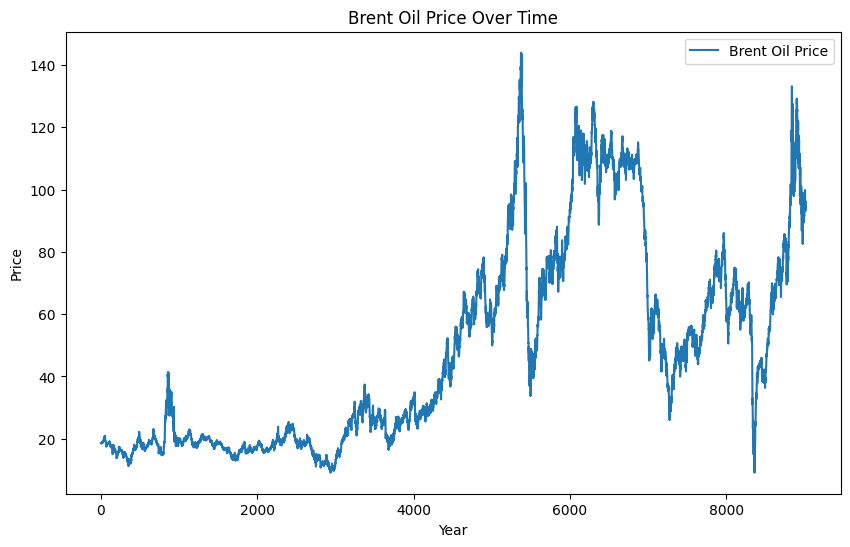

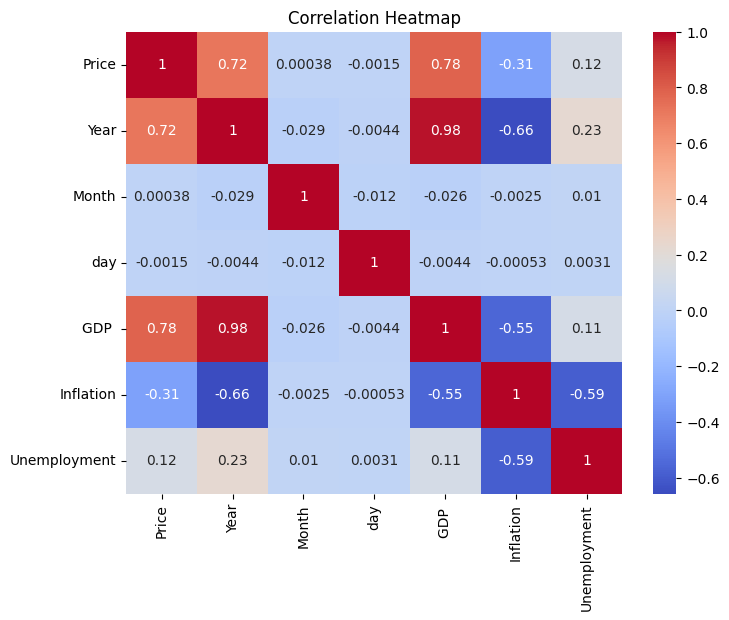

In [8]:
brent_analysis.perform_eda()

In [9]:

arima_model = brent_analysis.train_arima(order=(1,1,1))

ARIMA Model trained.


In [10]:
var_model = brent_analysis.train_var(lag_order=1)

VAR Model trained.


In [15]:
single = oil_data['Price']

In [13]:
brent_analysis.evaluate_model(model_name='ARIMA')

ARIMA Model Evaluation:
RMSE: 1.231303664939039
MAE: 0.7516215716043213


c:\Users\befekadum\Documents\10x acadamy\week10\Change_point_analysis-\myvenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(1.231303664939039), np.float64(0.7516215716043213))

In [14]:
brent_analysis.generate_insights()

VAR Model Coefficients:
                        Price          Year         Month           day  \
const           -2.663379e-05  5.052734e-04  1.364818e-05 -8.721103e-06   
L1.Price         9.981491e-01 -2.668820e-05  3.269901e-04  1.075617e-05   
L1.Year         -1.560672e-04  9.999874e-01  1.024580e-04  2.088346e-03   
L1.Month        -7.836956e-03  1.839495e-03  9.780353e-01 -2.994417e-03   
L1.day           1.990726e-03  7.586536e-04 -2.925129e-04  7.336561e-01   
L1.GDP           2.109424e-15  3.324435e-17 -3.736161e-16 -1.059040e-15   
L1.Inflation     4.864666e-03  6.850060e-05 -7.856636e-04  4.772132e-04   
L1.Unemployment  4.807482e-02  6.585307e-04 -8.112612e-03  1.183190e-02   

                         GDP      Inflation  Unemployment  
const           -1.051162e+07  2.255160e-04 -8.559137e-04  
L1.Price         7.391216e+07  1.228517e-04 -4.191273e-06  
L1.Year         -6.050396e+07  2.523341e-05  5.936879e-06  
L1.Month         4.363963e+09  8.213190e-05 -3.645993e-05  
